In [7]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

def analyze_audio(file_path):
    # Read the WAV file
    rate, data = wav.read(file_path)
    # Calculate number of samples per second based on the sampling rate
    samples_per_second = rate
    db_levels = []
    
    # Loop through each second of data
    for start in range(0, len(data), samples_per_second):
        end = start + samples_per_second
        if end > len(data):
            end = len(data)
        # Calculate RMS of the segment
        rms = np.sqrt(np.mean(data[start:end]**2)) if len(data[start:end]) > 0 else 0
        # Convert RMS to decibels
        db = 20 * np.log10(rms) if rms > 0 else 0  # Avoid log of zero error
        db_levels.append(db)
    
    return db_levels


def plot_decibel_levels(db_levels):
    # Plotting the decibel levels
    plt.figure(figsize=(10, 5))
    plt.plot(db_levels, label='Decibel Level', marker='o', linestyle='-', markersize=8)
    plt.xlabel('Seconds')
    plt.ylabel('Decibel (dB)')
    plt.title('Decibel Levels Over Time')
    plt.legend()
    plt.xticks(range(len(db_levels)), labels=[f"Second {i+1}" for i in range(len(db_levels))])  # Label each second
    plt.grid(True)
    plt.show()


file_path = 'test.wav'
db_levels = analyze_audio(file_path)
print(db_levels)

[35.10581464319065, 35.34733079422282, 35.117834003847776, 35.4679739880052, 35.39410307980697, 35.25824836691877, 35.31574370816139, 35.40012025010902, 35.44486136013178, 35.15780422280087, 34.96970408508414, 35.110812917929806, 35.22353551947129, 35.41235655242098, 35.357133597935395, 34.769123229405324, 35.22999409203269, 35.20031301832301, 35.27443620752999, 35.23298629087394, 35.43307739503843, 34.99087246448007, 35.019047532603345, 35.174452039468406, 35.437382351943384, 35.39878738527711, 35.1370748561592, 35.26238080871715, 35.212734273960656, 35.12471941939128, 35.02169758374785, 34.873028050678286, 34.868011432441214, 35.085480372939955, 35.46162604262711, 34.67461979069266, 35.27961232397939, 35.37446908729363, 35.348993193256874, 35.360879855742205, 35.36781756062687, 35.193723512374405, 35.3621132978624, 35.340379870683655]


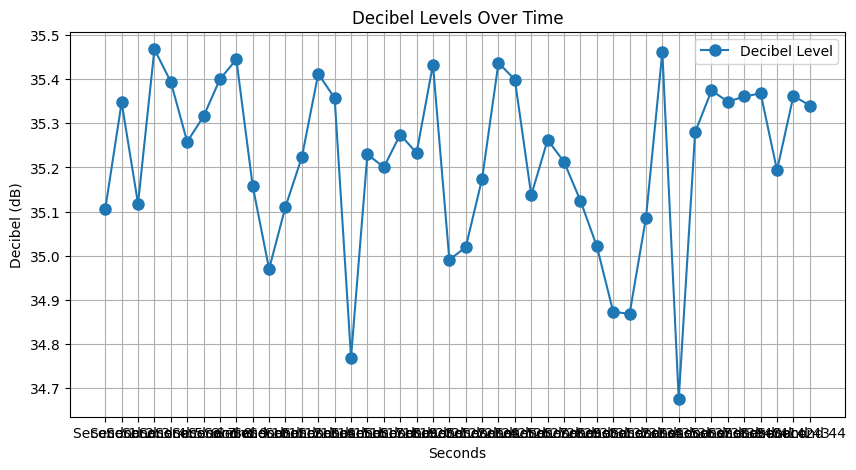

In [8]:
plot_decibel_levels(db_levels)